# Polywrap Minihack Votes Analyzer (WIP)
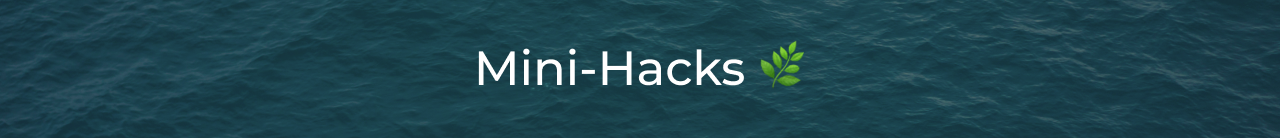
This pipeline is set up to facilitate minihack's retroactive contributions. In future rounds, by parsing the json generated by the tokenlog.xyz system, we can create detailed analitics and visuals of community participation, as well as calculating the resulting token rewards for each submission. Potentially in future iterations, this could fire an on-chain transaction too.

Full functional module could include:

1. Query current votes from tokenlog
1. Update vote.json file
1. Run data wrangling script
1. Calculate Token weights and overall participation
1. List unique participants
1. Time left to close vote, if still open
1. Generate several chart images with matplotlib or seaborn
1. Send webhook embed message to polywrap discord
1. Post update to twitter through API, or just prepare text

In [1]:
import pandas as pd
import requests

In [2]:
issues = requests.get('https://api.github.com/repos/polywrap/mini-hacks/issues').json()

In [3]:
issues[1].keys()

dict_keys(['url', 'repository_url', 'labels_url', 'comments_url', 'events_url', 'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels', 'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments', 'created_at', 'updated_at', 'closed_at', 'author_association', 'active_lock_reason', 'body', 'reactions', 'timeline_url', 'performed_via_github_app'])

In [4]:
for i in issues[::-1]:
    print(i['number'], i['title'])

6 Results: 2021 Q1
12 Results: 2021 Q2
20 Results : 2021 Q3


In [5]:
df = pd.read_json('votes.json')

In [6]:
df.columns

Index(['closed', '_id', 'org', 'repo', 'number', 'amount', 'cost',
       'tokenAddress', 'timestamp', 'address', 'signature', '__v'],
      dtype='object')

In [7]:
df_current = df[df['closed'] == False].copy()

In [8]:
unique = df_current['address'].describe()['unique']

In [9]:
votes = df_current['cost'].sum()


In [10]:
results = df_current[['number','amount']].groupby('number').sum().reset_index()
print(results)
results 

   number   amount
0      11  1658.00
1      13   192.00
2      14   996.00
3      17  1264.73
4      19  1554.00


,number,amount
0,11,1658.00
1,13,192.00
2,14,996.00
3,17,1264.73
4,19,1554.00


In [11]:
# Below,the idea is to add the title property of the issues to each of the entries on the table


results['number'].apply(lambda x: issues[number])

NameError: name 'number' is not defined

In [ ]:
results_named = results.copy()
def add_title(df, response):
    df
    for i in issue_nums:
    
    results_named['title'] = results 

## Put together the tokenlog results, with the github data to get the text sting of the name for each issue
# ref: https://docs.github.com/en/rest/reference/issues

for i in issues:
#    print(i)
    submission = i['number']
#    issue_num = results['number']
    
    if submission == issue_num:
        print("bingo")
    else: print("bango")

In [ ]:
print(f"This round {unique} unique addresses have participated {votes} WRAP have voted so far, which represents a  on this round's minihack.")



In [ ]:
supply = 11945
print(f"For this round, total participation so far has been ~{int(votes / supply*100)}%") 

In [ ]:
import matplotlib.pyplot as plt 

plt.pie(results['amount'])

In [ ]:
df_current['address'].unique()